In [25]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [26]:
# 2. Đọc file dữ liệu và chia train test theo tỉ lệ 7:3
df = pd.read_csv('../Dataset/VCB-Historical-Data_Group 9.csv')
df["Price"] = df["Price"].str.replace(',', '').astype(float)

data = df[['Price']]
data = data.dropna()
data = data.iloc[::-1] 
data = data.reset_index(drop=True) 


In [27]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 7:2:1
train_size = int(0.7 * len(data))

train_data = data[:train_size]
test_data = data[train_size:]

In [28]:
# 3. Preparing the data

x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)

In [29]:
# 4.  Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [30]:
# 5. Predict on test set
y_pred = model.predict(x_test)

In [31]:
# 6. Predicted closing prices for the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[[97677.65760537]
 [97712.19682469]
 [97746.73604401]
 [97781.27526333]
 [97815.81448264]
 [97850.35370196]
 [97884.89292128]
 [97919.4321406 ]
 [97953.97135992]
 [97988.51057924]
 [98023.04979856]
 [98057.58901787]
 [98092.12823719]
 [98126.66745651]
 [98161.20667583]
 [98195.74589515]
 [98230.28511447]
 [98264.82433379]
 [98299.3635531 ]
 [98333.90277242]
 [98368.44199174]
 [98402.98121106]
 [98437.52043038]
 [98472.0596497 ]
 [98506.59886902]
 [98541.13808834]
 [98575.67730765]
 [98610.21652697]
 [98644.75574629]
 [98679.29496561]]


In [32]:
# 7. RMSE, MAPE, MAE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mape = np.mean(np.abs((y_test - y_pred) / y_pred)) * 100
test_mae = np.mean(np.abs(y_test - y_pred))

print('MAE:', test_mae)
print('MAPE:', test_mape)
print('RMSE:', test_rmse)


MAE: 7076.023127648386
MAPE: 7.789120055628132
RMSE: 8414.311162742488


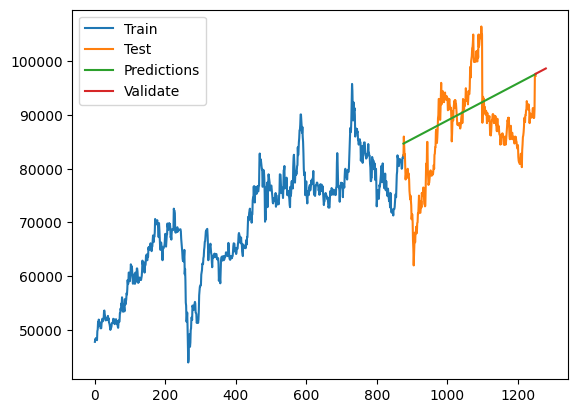

In [33]:
# 8. Plotting
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()